## Linear model selection and model regularization

선형모형을 다시 돌아보자.

$$ Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon $$

선형모형은 간단함에도 불구하고, interpretablity가 좋고, 종종 좋은 predictive performance를 보인다.

이 장에서는 선형모형의 기본적인 장점은 유지하면서 단점을 보완하는 대안들을 살펴본다.

### Why consider alternatives?

* Prediction accuracy : 만약 $p > n$인 경우, 일반적인 least square estimation을 적용할 수 없다. 추정될 모수의 수를 제한하여 추정량의 분산을 줄이고 예측 정확성을 높인다.

* Model interpretability : 불필요한 feature 변수를 제외하여 모형을 보다 해석 가능하도록 만든다. feature selection 혹은 variable selection이 자동으로 이루어지는 방법에 대해 알아본다.

### 세가지 방법

* Subset selection : $p$개의 predictor 중에서 반응변수와 연관이 있을 것으로 생각되는 부분 집합을 식별하는 방법.

* Shrinkage (regularization) : $p$개의 predictor를 모형 적합에 사용하지만, 그 중의 일부 predictor들의 해당되는 계수는 0 혹은 0과 매우 가까운 값으로 추정된다. 

* Dimension reduction : $p$개의 predictor를 $M$-dimensional subspace로 투영하는 방법.

### Subset selection

$p$개의 predictor가 있을 때, $k=1, 2, \cdots, p$에 대하여 다음을 실행한다.

* 각 $k$에 대하여 정확히 $\binom{p}{k}$개의 가능한 모형이 있다. 이 모형들에 대해 모두 적합을 진행한다.

  * 각 $k$에 대하여 적합된 모형 중 가장 적합이 잘된 모형이 있을 것이다. 이를 $\mathcal M_k$라 하자.
  
  * 한편 predictor가 없는 단순한 평균 모형은 $\mathcal M_0$라고 하겠다.
  
* $\mathcal M_0, \mathcal M_1, \cdots, \mathcal M_p$ 중에서 best인 모형을 찾는다. 

  * Best를 찾기 위해서 cross-validated prediction error, $C_p$ (AIC), BIC 혹은 adjusted $R^2$ 등이 이용될 수 있다.

### Shrinkage methods

적절한 constraint 혹은 regularization 방법을 통해 불필요한 추정치를 0으로 가깝게 만드는 방법이다.

#### Ridge regression

Least square 방식을 다시 돌아보자. 이 방법에서는 다음을 최소화하는 다음을 최소화하는 $\beta$들의 값을 찾는다.

$$ \mathrm{RSS} = \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 $$

반면 ridge regression에서는 다음을 최소화하는 $\beta$들의 값을 찾는다.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 = \mathrm{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2 $$

여기서 $\lambda \geq 0 $으로 tuning parameter라고 불리운다.

이 추정량을 $\hat \beta^{R}$이라 하겠다.

$\lambda \sum_{j=1}^{p} \beta_j^2$는 shrinkage penalty라고 불리우며, $\beta$들이 0에 가까울수록 작아진다.

적절한 $\lambda$를 선택하는 것이 중요하며 이는 cross-validation 방법을 통해 선택한다.

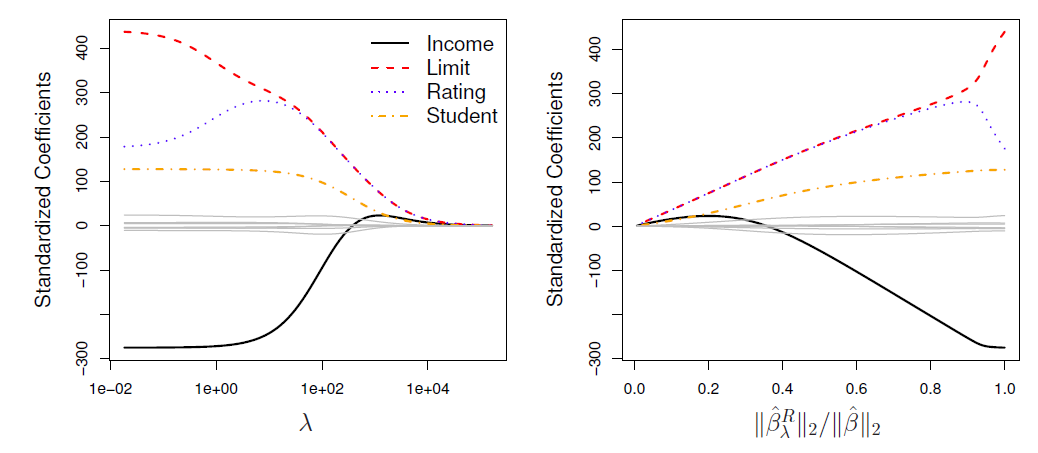

위 그림의 왼쪽에서 보듯 $\lambda$가 커지면 결국 모든 $\beta$들의 추정치는 0에 가까워진다.

오른쪽 그림에서는 x-축에 $ \dfrac{|| \hat \beta_\lambda^R ||_2}{|| \hat \beta ||_2} $를 표현하였다.

여기서 $|| \cdot ||_2$는 $\ell_2$-norm으로서 다음으로 정의한다.

$$ || \beta ||_2 = \sqrt{\sum_{j=1}^{p} \beta_j^2} $$

한편, ridge regression에서는 predictor들을 표준화하여 모형을 적합하는 것이 좋다.

$$ \tilde x_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \bar x_j)^2}} $$

#### Bias-variance tradeoff

50개의 데이터와 45개의 predictor를 이용한 시뮬레이션 실험. 실험에서는 모두 non-zero coefficient를 가정하였다.

아래 그림에서 검은 선이 squared bias, 초록색이 variance, test error가 자주색이다.

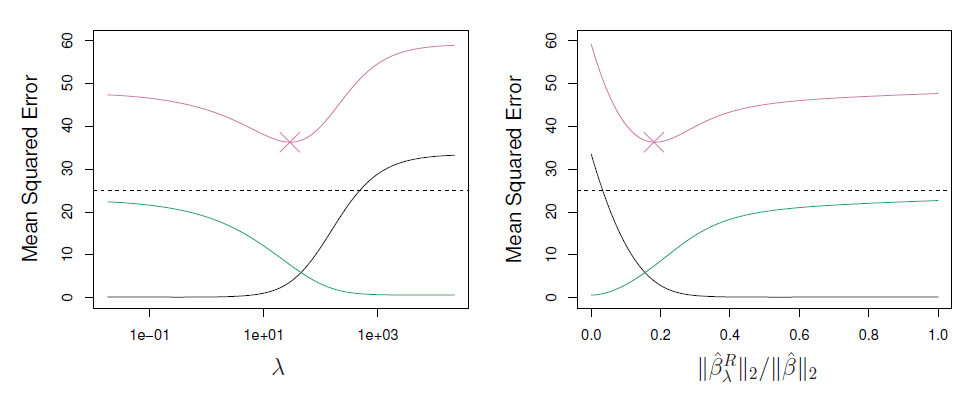

### Lasso 

Ridge regression은 $\lambda$에 따라 coefficient들의 값을 0에 가깝게 보내기는 하지만 완전히 0이 되는 것이 아니기 때문에 최종 모형에는 결국 총 $p$개의 predictor들이 모두 포함된다.

Lasso는 ridge의 대안으로, 다음을 최소화하는 $\beta$들을 찾으며 이를 $\hat \beta_\lambda^L$이라고 하겠다.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| = \mathrm{RSS} + \lambda \sum_{j=1}^{p} |\beta_j| $$

통계적 용어로 이야기하자면, lasso는 $\ell_1$ penalty를 사용하고 ridge는 $\ell_2$ penaltiy를 사용하는 것이다.

Ridge와 마찬가지로 lasso 또한 coefficient 추정치를 0으로 보내지만 ridge와 달리 $\lambda$가 충분히 크면 완전히 0의 값이 된다.

따라서 lasso는 일종의 variable selection 역할을 한다.

Lasso는 sparse 모형을 만들어낸다고도 한다.

마찬가지로 적절한 $\lambda$의 값을 선택하는 것이 중요하며 cross-validation 방법이 이용된다.

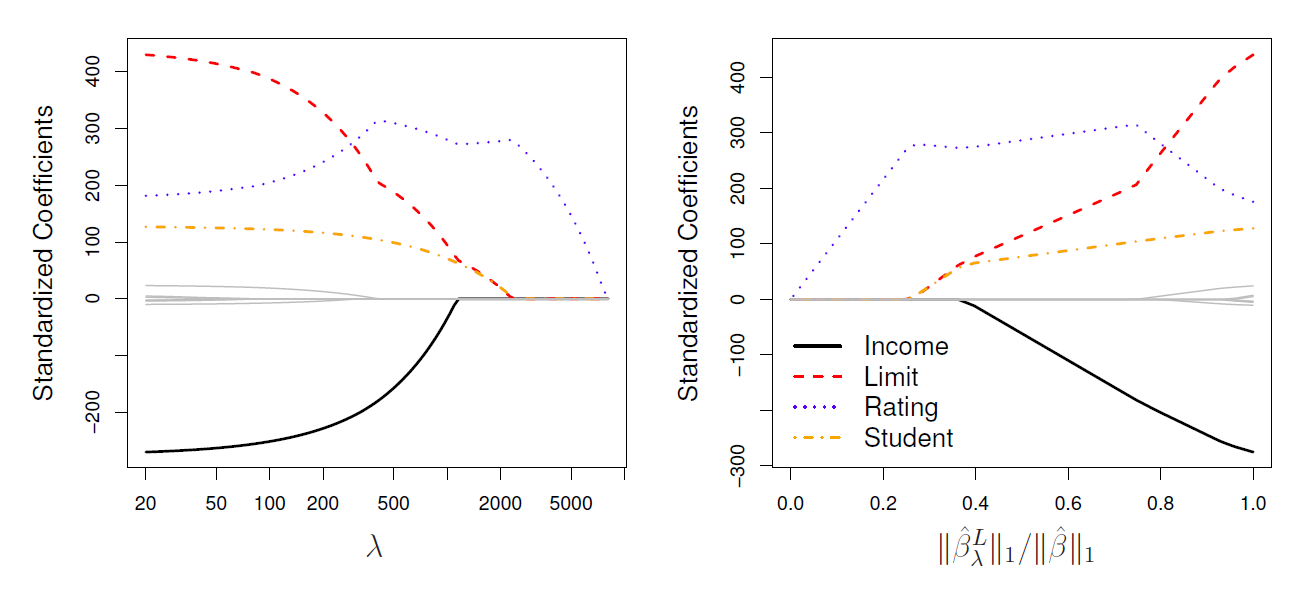

#### Ridge와 Lasso의 차이

Lasso와 ridge regression은 각각 결국 다음의 문제를 해결하는 것과 같다.

$$ \arg \min_{\beta} \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  \text{ subject to }  \sum_{j=1} |\beta_j| \leq s $$

$$ \arg \min_{\beta} \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  \text{ subject to }  \sum_{j=1} \beta_j^2 \leq s $$

그림으로 표현하자면 다음과 같으며, 단순히 Ridge와 Lasso 중 어느 것이 더 낫다고 결론을 지을 수는 없다.

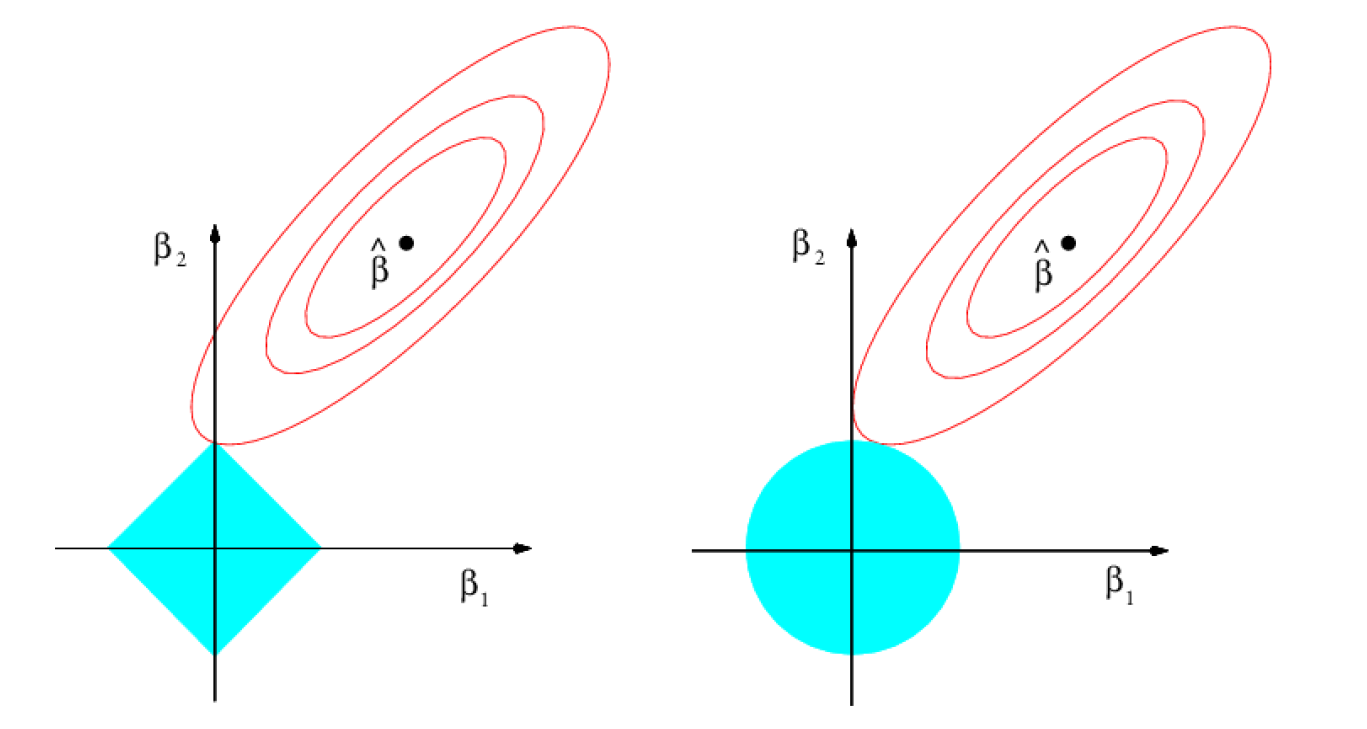

#### 모형 선택

앞서 이야기했듯이 $\lambda$는 cross-validation 방법을 통해 정한다.

아래는 ridge regression의 cross-validation 방법을 통해 선택한 $\lambda$의 예제이다.

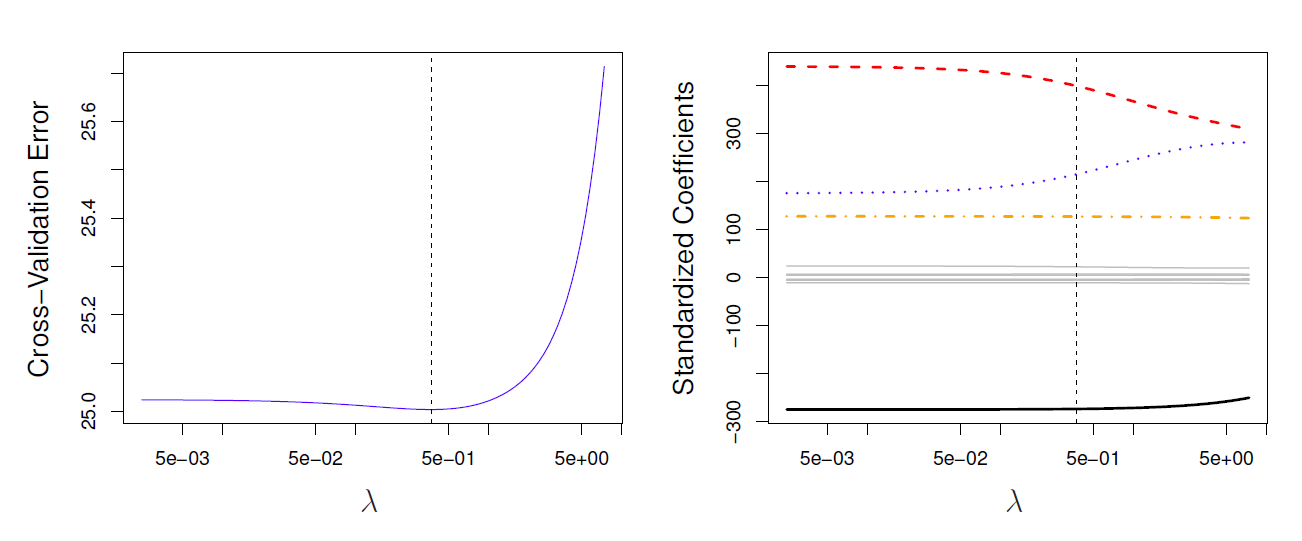

아래는 lasso에서 10-fold cross-validation을 이용하여 $\lambda$의 값을 정하는 예제이다.

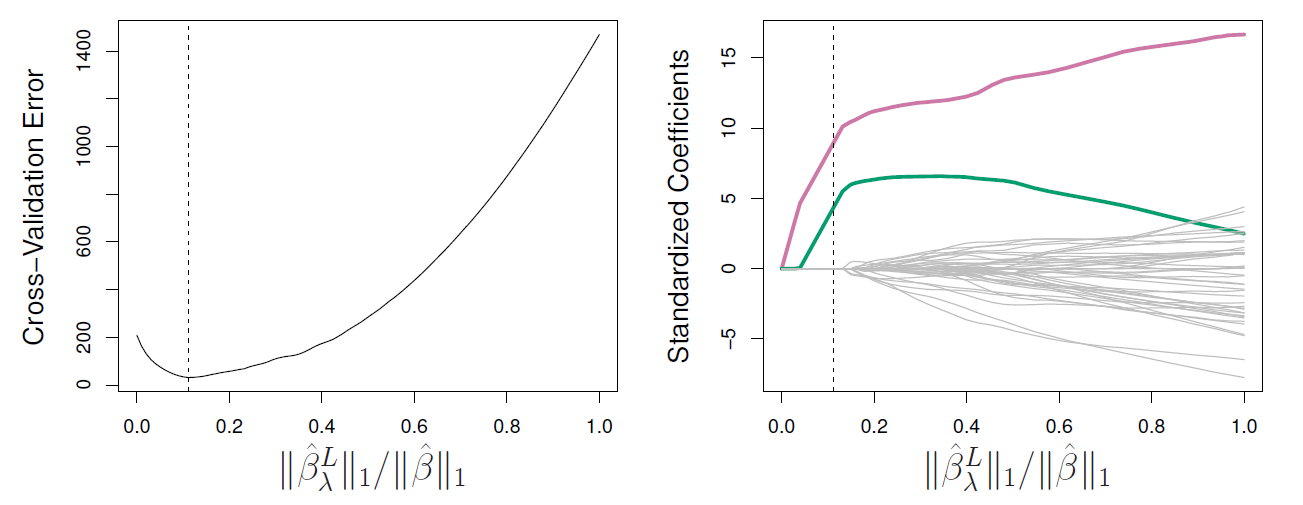

### 엘라스틱넷 (elastic net)

Ridge와 Lasso를 절충한 모델.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + r \lambda \sum_{j=1}^{p} |\beta_j| + \frac{1-r}{2} \lambda \sum_{j=1}^{p} \beta_j^2$$

혼합 정도는 혼합 비율 $r$을 조절하여 사용한다.

### sklearn 예제

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [2]:
import pandas as pd
pd.DataFrame(X)

0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  
1    396.90  9.14  
2    392.83  4.03  
3    394.63  2.94  
4    396.90  5.33  
..      ...   ...  
501  391.99  9.67  
502  396.90  9.08  
503  396.90  5.64  
504  393.45  6.48  
505  396.90  7.88  

[506 rows x 13 columns]

In [3]:
pd.DataFrame(y)

0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]

In [4]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [5]:
pd.DataFrame(X_tn)

0     1      2    3       4      5     6       7     8      9   \
0    8.05579   0.0  18.10  0.0  0.5840  5.427  95.4  2.4298  24.0  666.0   
1    0.14476   0.0  10.01  0.0  0.5470  5.731  65.2  2.7592   6.0  432.0   
2    0.03961   0.0   5.19  0.0  0.5150  6.037  34.5  5.9853   5.0  224.0   
3    0.02985   0.0   2.18  0.0  0.4580  6.430  58.7  6.0622   3.0  222.0   
4    0.24980   0.0  21.89  0.0  0.6240  5.857  98.2  1.6686   4.0  437.0   
..       ...   ...    ...  ...     ...    ...   ...     ...   ...    ...   
374  0.55007  20.0   3.97  0.0  0.6470  7.206  91.6  1.9301   5.0  264.0   
375  0.80271   0.0   8.14  0.0  0.5380  5.456  36.6  3.7965   4.0  307.0   
376  0.05602   0.0   2.46  0.0  0.4880  7.831  53.6  3.1992   3.0  193.0   
377  0.21038  20.0   3.33  0.0  0.4429  6.812  32.2  4.1007   5.0  216.0   
378  0.24522   0.0   9.90  0.0  0.5440  5.782  71.7  4.0317   4.0  304.0   

       10      11     12  
0    20.2  352.58  18.14  
1    17.8  391.50  13.61  
2    20.2  396.90   8.01  
3    18.7  394.12   5.21  
4    21.2  392.04  21.32  
..    ...     ...    ...  
374  13.0  387.89   8.10  
375  21.0  288.99  11.69  
376  17.8  392.63   4.45  
377  14.9  396.90   4.85  
378  18.4  396.90  15.94  

[379 rows x 13 columns]

In [6]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [7]:
pd.DataFrame(X_tn_std)

0         1         2         3         4         5         6   \
0    0.423010 -0.474831  0.980771 -0.271393  0.199261 -1.190126  0.895718   
1   -0.407027 -0.474831 -0.191352 -0.271393 -0.110546 -0.767007 -0.173970   
2   -0.418059 -0.474831 -0.889700 -0.271393 -0.378487 -0.341104 -1.261368   
3   -0.419083 -0.474831 -1.325805 -0.271393 -0.855757  0.205890 -0.404201   
4   -0.396006 -0.474831  1.529887 -0.271393  0.534188 -0.591635  0.994895   
..        ...       ...       ...       ...       ...       ...       ...   
374 -0.364501  0.411785 -1.066460 -0.271393  0.726770  1.285958  0.761122   
375 -0.337994 -0.474831 -0.462288 -0.271393 -0.185904 -1.149763 -1.186986   
376 -0.416337 -0.474831 -1.285237 -0.271393 -0.604562  2.155858 -0.584843   
377 -0.400142  0.411785 -1.159187 -0.271393 -0.982191  0.737573 -1.342834   
378 -0.396486 -0.474831 -0.207289 -0.271393 -0.135665 -0.696023  0.056261   

           7         8         9         10        11        12  
0   -0.623745  1.627357  1.507544  0.783158 -0.021648  0.699497  
1   -0.468861 -0.419440  0.121440 -0.298635  0.400934  0.087575  
2    1.048046 -0.533151 -1.110652  0.783158  0.459566 -0.668884  
3    1.084204 -0.760573 -1.122499  0.107038  0.429381 -1.047114  
4   -0.981660 -0.646862  0.151058  1.233905  0.406797  1.129057  
..        ...       ...       ...       ...       ...       ...  
374 -0.858703 -0.533151 -0.873712 -2.462219  0.361738 -0.656727  
375  0.018876 -0.646862 -0.619000  1.143755 -0.712091 -0.171782  
376 -0.261974 -0.760573 -1.294282 -0.298635  0.413203 -1.149776  
377  0.161910 -0.533151 -1.158041 -1.605800  0.459566 -1.095743  
378  0.129466 -0.646862 -0.636771 -0.028187  0.459566  0.402316  

[379 rows x 13 columns]

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tn_std, y_tn)

LinearRegression()

In [9]:
print(lr.coef_, lr.intercept_)

[-1.02432507  1.00495608  0.39945581  0.49799292 -2.2638994   2.75417066
  0.12747394 -3.14377083  2.73001203 -2.25793476 -2.24201845  1.04627036
 -3.93493113] 22.36965699208446


### sklearn에서의 Ridge, Lasso regression

[```sklearn.linear_model.Ridge```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

minimize ```||y - Xw||^2_2 + alpha * ||w||^2_2```

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)   
ridge.fit(X_tn_std, y_tn)
print(ridge.coef_, ridge.intercept_)

[-1.01247522  0.98562981  0.36374993  0.50361745 -2.22262049  2.76733246
  0.11563627 -3.11010544  2.62393829 -2.15770734 -2.22964873  1.04701681
 -3.91550086] 22.36965699208446


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error

alphas = np.array([0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000])

coefs = []
errs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_tn_std, y_tn)
    coefs.append(ridge.coef_)
    errs.append(mean_squared_error(y_te, ridge.predict(X_te_std)))

In [12]:
pd.DataFrame(coefs)

0         1         2         3         4         5         6   \
0  -1.024203  1.004757  0.399083  0.498051 -2.263478  2.754308  0.127351   
1  -1.023106  1.002970  0.395744  0.498574 -2.259692  2.755534  0.126252   
2  -1.018307  0.995145  0.381218  0.500855 -2.243040  2.760881  0.121451   
3  -1.012475  0.985630  0.363750  0.503617 -2.222620  2.767332  0.115636   
4  -0.971464  0.918500  0.246671  0.522728 -2.073321  2.810980  0.075365   
5  -0.930774  0.851577  0.140464  0.541239 -1.915361  2.850340  0.036559   
6  -0.771654  0.592255 -0.188601  0.611918 -1.217054  2.913913 -0.102853   
7  -0.696309  0.483010 -0.307084  0.640774 -0.871089  2.806834 -0.162599   
8  -0.537200  0.369960 -0.447826  0.544788 -0.446045  1.867069 -0.271845   
9  -0.447071  0.332274 -0.428238  0.406013 -0.382485  1.313040 -0.285860   
10 -0.196766  0.165679 -0.221292  0.126000 -0.196810  0.412967 -0.168622   
11 -0.116155  0.100080 -0.134122  0.067391 -0.120320  0.225979 -0.104488   

          7         8         9         10        11        12  
0  -3.143431  2.728907 -2.256886 -2.241892  1.046279 -3.934734  
1  -3.140375  2.719005 -2.247487 -2.240755  1.046352 -3.932959  
2  -3.126857  2.675884 -2.206662 -2.235762  1.046661 -3.925136  
3  -3.110105  2.623938 -2.157707 -2.229649  1.047017 -3.915501  
4  -2.981944  2.272857 -1.834099 -2.185129  1.048717 -3.843421  
5  -2.835774  1.948873 -1.549149 -2.137914  1.048528 -3.763112  
6  -2.049686  0.885788 -0.772445 -1.904491  1.006393 -3.307842  
7  -1.530634  0.464562 -0.583145 -1.736645  0.932091 -2.940863  
8  -0.408885 -0.159730 -0.486268 -1.151411  0.601942 -1.756562  
9  -0.113534 -0.255957 -0.448871 -0.845992  0.451907 -1.244821  
10  0.075807 -0.175218 -0.226380 -0.293984  0.176834 -0.420576  
11  0.057305 -0.109333 -0.136679 -0.164834  0.102710 -0.235552

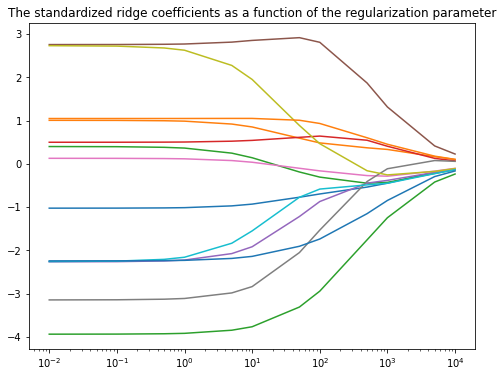

In [13]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("The standardized ridge coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

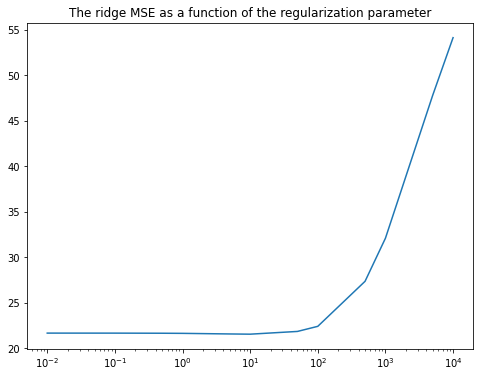

In [14]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs)
ax.set_xscale("log")
plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

[```sklearn.linear_model.Lasso```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

minimize 1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1) 
lasso.fit(X_tn_std, y_tn)
print(lasso.coef_, lasso.intercept_)

[-0.73597982  0.61695348 -0.          0.48470141 -1.68049153  2.9243023
 -0.         -2.57039745  1.06638077 -0.7490384  -2.07537355  0.98831828
 -3.85489943] 22.36965699208446


In [16]:
L_coefs = []
L_errs = []

alphas = np.arange(0.1, 10, 0.1)

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_tn_std, y_tn)
    L_coefs.append(lasso.coef_)
    L_errs.append(mean_squared_error(y_te, lasso.predict(X_te_std)))

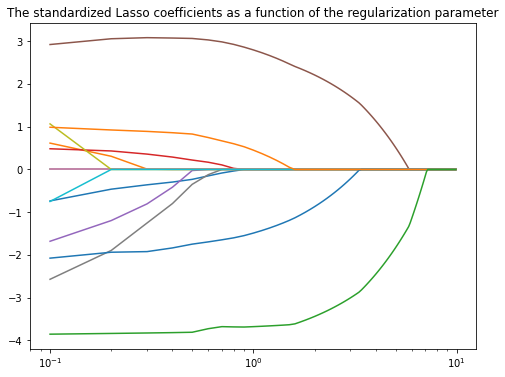

In [17]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_coefs)
ax.set_xscale("log")
plt.title("The standardized Lasso coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

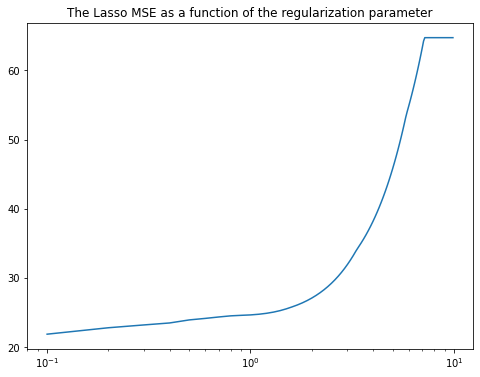

In [18]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_errs)
ax.set_xscale("log")
plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

### with K-fold cross validation

In [19]:
from sklearn.model_selection import KFold

In [20]:
import numpy as np
alphas = np.arange(0.01, 10, 0.01)

errs_alpha = [] # alpha별 에러

for a in alphas:
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        ridge = Ridge(alpha = a)
        ridge.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))
        
    errs_alpha.append(np.mean(kfold_errs))

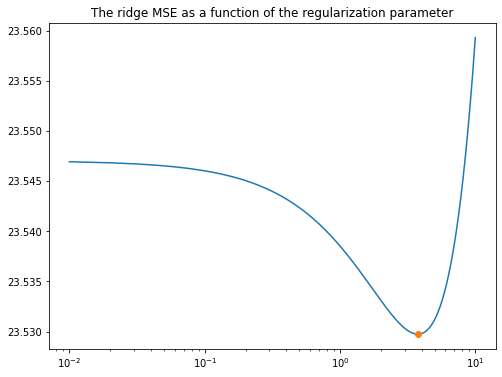

In [21]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

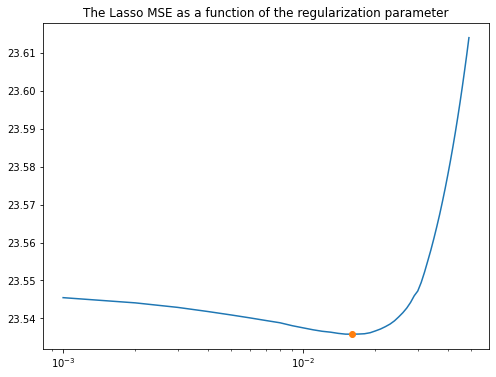

In [22]:
alphas = np.arange(0.001, 0.05, 0.001)

errs_alpha = [] # alpha별 에러


for a in alphas:
    
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)

    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        lasso = Lasso(alpha = a)
        lasso.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, lasso.predict(X_test_std)))
        
    errs_alpha.append(np.mean(kfold_errs))
    

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

### sklearn에서의 ElasticNet

[```sklearn.linear_model.ElasticNet```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

minimize 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [23]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.1)

In [24]:
print(elastic.coef_, elastic.intercept_)

[-0.76955595  0.63566375 -0.          0.53987645 -1.51809029  2.93577033
 -0.         -2.34148298  1.09521632 -0.87240569 -2.01704207  1.01017658
 -3.63301496] 22.36965699208446


In [25]:
pred_lr = lr.predict(X_te_std)
pred_ridge = ridge.predict(X_te_std)
pred_lasso = lasso.predict(X_te_std)
pred_elastic = elastic.predict(X_te_std)

In [26]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_lr))
print(mean_squared_error(y_te, pred_ridge))
print(mean_squared_error(y_te, pred_lasso))
print(mean_squared_error(y_te, pred_elastic))

21.685102460758397
20.967928430228945
21.00857618333089
21.825841617030587


#### Hitter example

In [27]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')
df = df.dropna(axis=0)
df.head()

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   
5   -Alfredo Griffin    594   169      4    74   51     35     11    4408   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   
5   1133  ...    501   336     194       A        W     282      421      25   

   Salary  NewLeague  
1   475.0          N  
2   480.0          A  
3   500.0          N  
4    91.5          N  
5   750.0          A  

[5 rows x 21 columns]

In [28]:
from sklearn.model_selection import train_test_split

y = df["Salary"]
X = df.iloc[:, 1:]
X = X.drop(["Salary", "League", "Division", "NewLeague"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)   
ridge.fit(X_train_std, y_train)
print(ridge.coef_, ridge.intercept_)

[-165.77223506  250.48221402  -30.51337531  -42.50627254    8.26120178
  146.28286575  -13.32510932 -225.73860273   21.08651916  123.50314302
  390.59892201  105.21076159 -188.7547621    74.31874916   13.50749829
   -4.12325326] 547.2123908629443


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error

alphas = np.array([0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000])

coefs = []
errs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_std, y_train)
    coefs.append(ridge.coef_)
    errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))

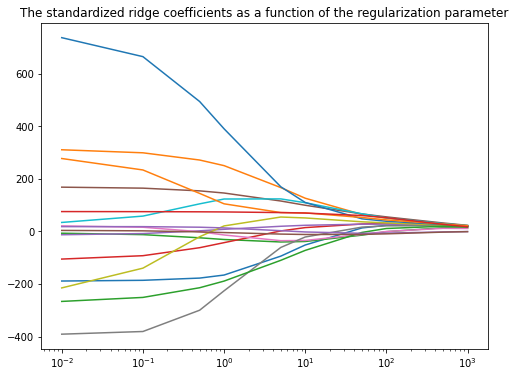

In [32]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("The standardized ridge coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

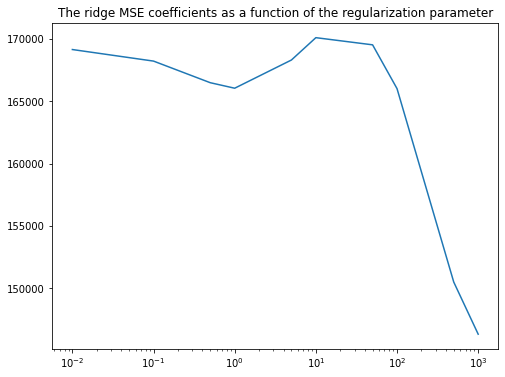

In [33]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs)
ax.set_xscale("log")
plt.title("The ridge MSE coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1) 
lasso.fit(X_train_std, y_train)
print(lasso.coef_, lasso.intercept_)

[-161.91279998  256.4350357   -21.52789734  -54.16536297    0.
  148.68932306   -0.         -295.3492677    -0.          106.42002579
  471.77568997  130.45014319 -202.2716639    73.87616363   12.32566097
   -0.        ] 547.2123908629443


In [35]:
L_coefs = []
L_errs = []

alphas = np.array([0.5, 1, 2.5, 5, 10, 25, 50, 100])

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_std, y_train)
    L_coefs.append(lasso.coef_)
    L_errs.append(mean_squared_error(y_test, lasso.predict(X_test_std)))

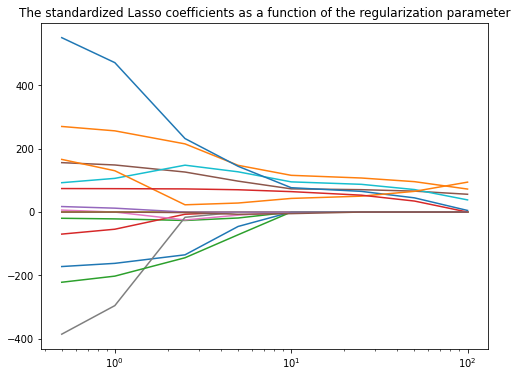

In [36]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_coefs)
ax.set_xscale("log")
plt.title("The standardized Lasso coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

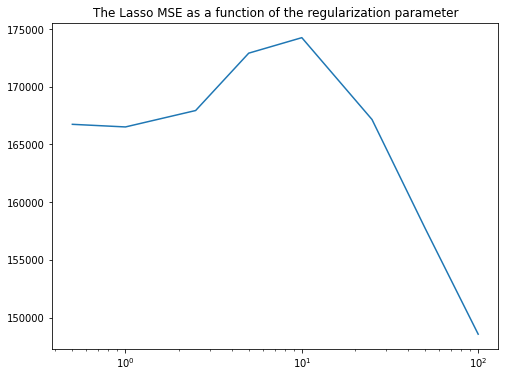

In [37]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_errs)
ax.set_xscale("log")
plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

#### with k-fold

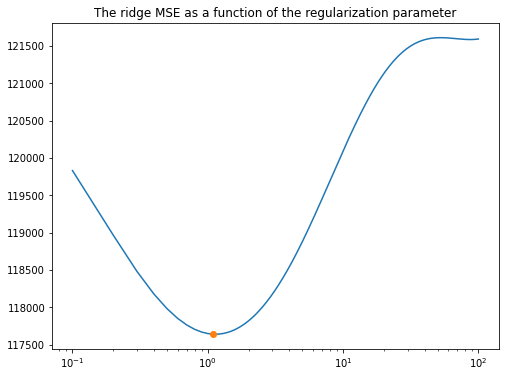

In [38]:
from sklearn.model_selection import KFold
alphas = np.arange(0.1, 100, 0.1)

errs_alpha = [] # alpha별 에러


for a in alphas:
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        ridge = Ridge(alpha=a)
        ridge.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))
                
    errs_alpha.append(np.mean(kfold_errs))
    

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.805e+03, tolerance: 4.716e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.991e+03, tolerance: 4.716e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.643e+03, tolerance: 4.716e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.661e+03, tolerance: 4.716e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

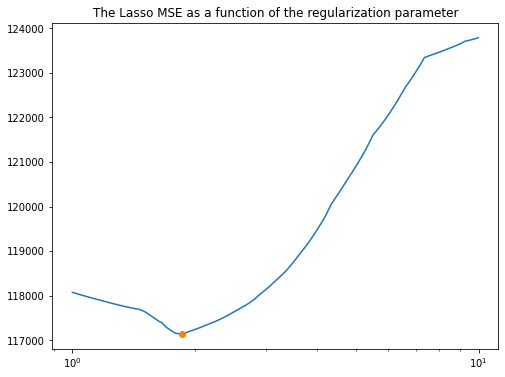

In [39]:
from sklearn.model_selection import KFold
alphas = np.arange(1, 10, 0.02)

errs_alpha = [] # alpha별 에러


for a in alphas:
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        lasso = Lasso(alpha=a)
        lasso.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, lasso.predict(X_test_std)))
                
    errs_alpha.append(np.mean(kfold_errs))
    

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()